In [32]:
# Importing the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\trive\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\trive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\trive\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
# Set seed for reproducibility
np.random.seed(42)

In [34]:
#importing the dataset
data=pd.read_csv('reviews.csv')
data.head(3)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo


In [35]:
#converting into lowercase
data['content']=data['content'].str.lower()

In [36]:
#removing all the links
df=pd.DataFrame(data)
def rem(text):
  p=r'https?://\S+'
  return re.sub(p,'',text)
df['content'].dtypes
df['content'] = df['content'].astype(str)
df['content']=df['content'].apply(rem)

In [37]:
#removing the new lines
def remove_next_lines(text):
  return text.replace('\n', '')
df['content'] = df['content'].apply(remove_next_lines)

In [38]:
#removing words with numbers
def remove_words_with_numbers(text):
  return ' '.join(word for word in text.split() if not any(c.isdigit() for c in word))
df['content'] = df['content'].apply(remove_words_with_numbers)

In [39]:
#removing extra spaces
def remove_extra_spaces(text):
  return re.sub(r'\s+', ' ', text)
df['content'] = df['content'].apply(remove_extra_spaces)

In [40]:
#removing special characters
def remove_special_characters(text):
  pattern = r'[^\w\s]'
  return re.sub(pattern, '', text)
df['content'] = df['content'].apply(remove_special_characters)

In [41]:
#removing stop words
stop_words = stopwords.words('english')
def remove_stopwords(text):
  words = nltk.word_tokenize(text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered_words)
df['content'] = df['content'].apply(remove_stopwords)

In [42]:
#stemming
stemmer = PorterStemmer()
def stem_words(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
df['content'] = df['content'].apply(stem_words)

In [43]:
#lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
df['content'] = df['content'].apply(lemmatize_words)
df.head(5)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceivingli terribl realli nice design fea...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


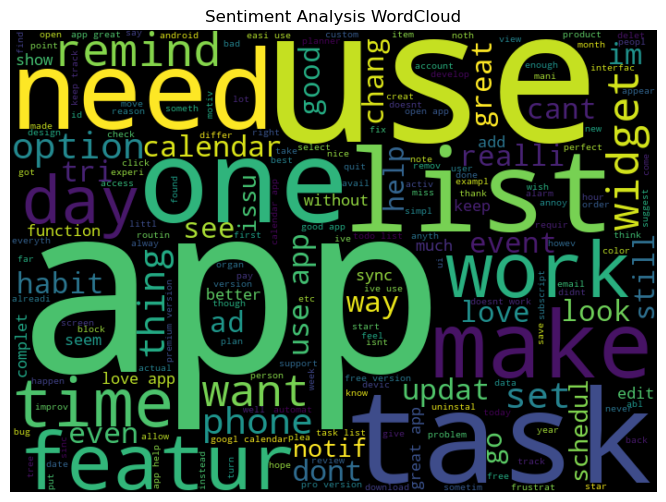

In [44]:
# df is the dataframe and content is the column in the dataframe
text_data = " ".join(df['content'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=700, height=500, background_color='black').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Sentiment Analysis WordCloud")
plt.axis('off')
plt.show()


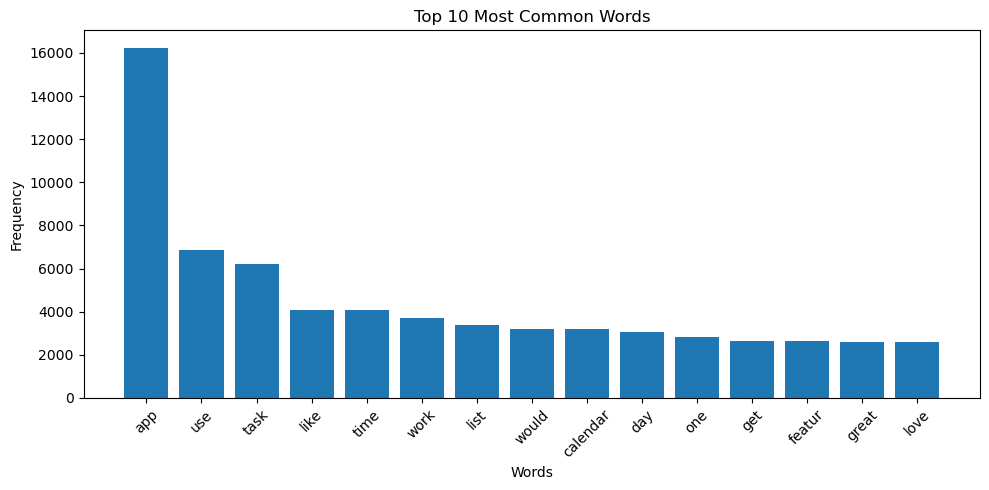

In [45]:
# Concatenate all text data into a single string
text_data = " ".join(df['content'].dropna())

# Split text data into words and count frequencies
words = text_data.split()
word_counts = Counter(words)

# Plot bar chart for the top 15 most common words
common_words = word_counts.most_common(15)  # You can change this number as needed
plt.figure(figsize=(10, 5))
plt.bar([word[0] for word in common_words], [word[1] for word in common_words])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

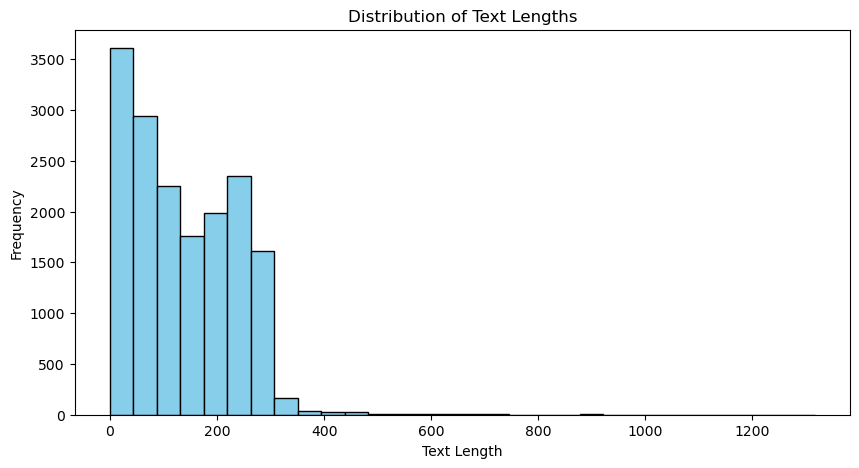

In [46]:
# Calculate the length of each text entry in the column
text_lengths = df['content'].dropna().apply(len)

# Plot histogram of text lengths
plt.figure(figsize=(10, 5))
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.grid(False)
plt.show()


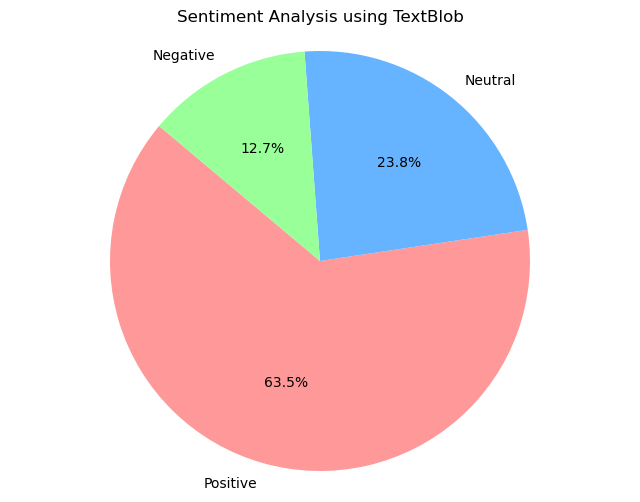

In [47]:
sentiments = []
# Perform sentiment analysis for each text in the dataset column
for text in df['content']:
    # Convert NaN values to empty strings
    if pd.isnull(text):
        text = ''
    # Convert the text to string
    text = str(text)
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    if sentiment_score > 0:
        sentiments.append('Positive')
    elif sentiment_score < 0:
        sentiments.append('Negative')
    else:
        sentiments.append('Neutral')

# Count the occurrences of each sentiment category
sentiment_distribution = pd.Series(sentiments).value_counts()

# Pie chart
labels = sentiment_distribution.index
sizes = sentiment_distribution.values
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis using TextBlob')
plt.axis('equal')
plt.show()

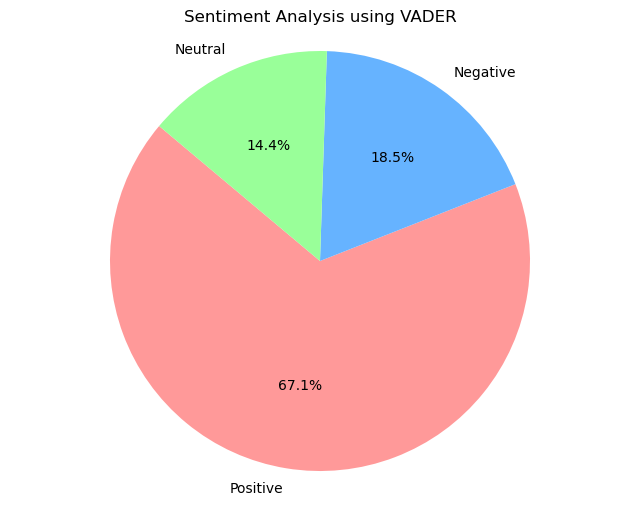

In [48]:
# Initialize VADER sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment polarity using VADER
def get_sentiment_polarity(text):
    scores = sid.polarity_scores(str(text))
    # Assign sentiment based on compound score
    if scores['compound'] > 0:
        return 'Positive'
    elif scores['compound'] < 0:
        return 'Negative'
    else:
        return 'Neutral'
df['content'] = df['content'].apply(get_sentiment_polarity)

# Count the occurrences of each sentiment category
sentiment_distribution = df['content'].value_counts()

# Plot the sentiment distribution
labels = sentiment_distribution.index
sizes = sentiment_distribution.values
colors = ['#ff9999', '#66b3ff', '#99ff99']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis using VADER')
plt.axis('equal')
plt.show()
